In [2]:
import numpy as np

In [40]:
# input
T = 10000 
max_cache_size = 100
files = 1000
locations = 2
caches = 2
action_dim = files * locations * caches + files * caches
l = np.array([[1]])

In [52]:
# main function
class LRUCache:
    def __init__(self, capacity: int):
        self.capacity = capacity
        self.linkedHashMap = dict()

    def get(self, key: int) -> int:
        """如果关键字key存在于缓存中，则返回关键字的值并将节点提至队尾，否则返回-1"""
        if key not in self.linkedHashMap:
            return -1
        val = self.linkedHashMap.pop(key)  # 元素移动到队尾
        self.linkedHashMap[key] = val
        return val

    def put(self, key: int, value: int) -> None:
        """如果key已存在，则更新value并将节点提至队尾；
        如果不存在，则向缓存中插入该键值对，
        如果插入时元素数量超过capacity，则逐出最久未使用的元素"""
        if key in self.linkedHashMap:
            self.linkedHashMap.pop(key)  # 更新value,元素移动到队尾
            self.linkedHashMap[key] = value
            return
        if len(self.linkedHashMap) >= self.capacity:
            firstKey = list(self.linkedHashMap.keys())[0]
            self.linkedHashMap.pop(firstKey)  # 删除队首的最久未使用元素
        self.linkedHashMap[key] = value
        return

LRU_caches = []
for items in range(0, caches):
  LRU_caches.append(LRUCache(capacity=max_cache_size))
utils = []

def cal_utility(locations,files,utils,LRU_caches):
      requested_location = np.random.randint(locations)
      requested_files = np.random.randint(files)
      ifin = LRU_caches[requested_location].get(requested_files)
      LRU_caches[requested_location].put(requested_files,requested_files)
      if ifin != -1:
        utils.append(1)
      else:
        utils.append(0)
      return utils, LRU_caches

In [53]:
# run LRU
utils_LRU = []
for t in range(1,T+1):
    uti,LRU_caches = cal_utility(locations,files,utils,LRU_caches)
    utils_LRU.append(sum(utils)/len(utils))

<function matplotlib.pyplot.show(*args, **kw)>

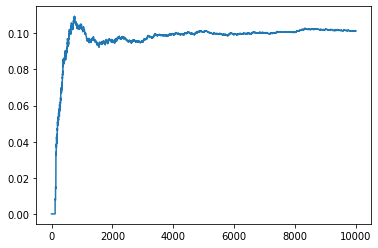

In [54]:
import matplotlib.pyplot as plt
plt.plot(range(1,10000+1),utils_LRU)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

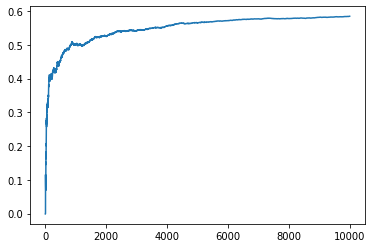

In [ ]:
# OGD
import matplotlib.pyplot as plt
utils_LRU = np.cumsum(utils_LRU) / np.arange(1, t)
plt.plot(range(1,10000+1),utils_LRU)
plt.show